# Library

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
from torchvision.utils import make_grid

from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

from PIL import Image
from IPython.display import display
import cv2
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import glob
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Full Code

Files already downloaded and verified
torch.Size([32, 3, 227, 227])
torch.Size([32])


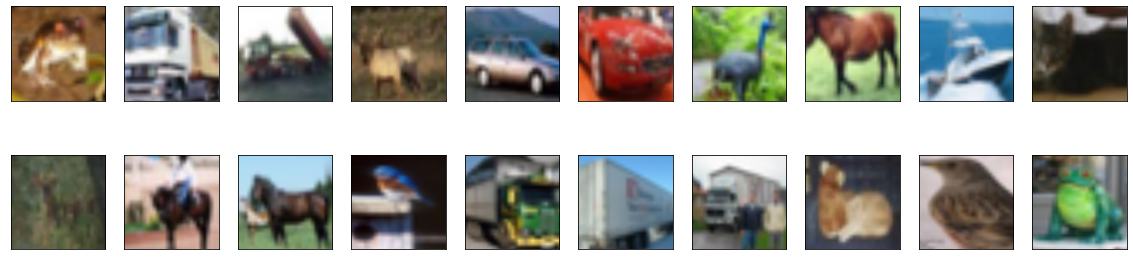

In [14]:
import torchvision
import torchvision.transforms as transforms

## ToTensor(), Resize(256), RandomCrop(227) ...

# function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0))) # convert from Tensor image

batch_size = 32

train_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Resize(256),
                                       transforms.RandomCrop(227),
                                       transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])])

train_data = datasets.CIFAR10('./data', train = True, download = True, transform = train_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

for x, y in train_loader:
    print(x.shape)
    print(y.shape)
    break

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# fig = plt.figure(figsize=(30, 30))
fig = plt.figure(figsize=(20, 5))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

## un-normalize
- transforms에서 -1 ~ 1 사이로 normalize 했던 것을 0 ~ 1 사이로 un-normalize 해서 이미지로 출력할 수 있게 함

In [6]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

normalized_img = images[0]
# print(normalized_img)
print(np.max(normalized_img), np.min(normalized_img))

un_normalized_img = normalized_img / 2 + 0.5
print('------------')
# print(un_normalized_img)
print(np.max(un_normalized_img), np.min(un_normalized_img))

0.9949142 -0.986826
------------
0.9974571 0.0065869987


## np.transpose(img, (1, 2, 0))
- (3, 227, 227) → (227, 227, 3) / (C, H, W) → (H, W, C)

In [8]:
print(un_normalized_img.shape)
print(np.transpose(un_normalized_img, (1, 2, 0)).shape)

(3, 227, 227)
(227, 227, 3)


# plt.imshow( )
- [Python matplotlib : imshow (array에 색을 채워 이미지로 표시하기)](https://cosmosproject.tistory.com/414)
- matplotlib의 `plt.imshow()` method는 array의 값들을 색으로 환산해서 이미지의 형태로 보여줌
- `plt.show()`를 해주는 이유?
- `plt.imshow()`는 주어진 array에서 최대값을 1, 최소값을 0으로 대응해서 전체적인 값을 동일한 비율로 조절하여 0~1 사이의 숫자로 변환한 후에 이미지를 나타냄

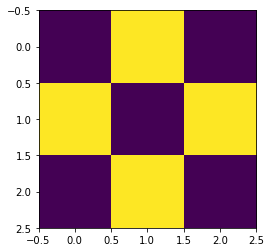

In [12]:
import numpy as np
import matplotlib.pyplot as plt

arr_test = np.array([[0, 1, 0],
                     [1, 0, 1],
                     [0, 1, 0]])

plt.imshow(arr_test)
plt.show()

## colormap 변경
- [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html#choosing-colormaps-in-matplotlib)

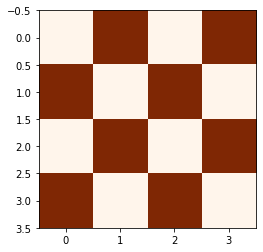

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

arr_test = np.array([[0, 1, 0, 1],
                     [1, 0, 1, 0],
                     [0, 1, 0, 1],
                     [1, 0, 1, 0]])

plt.imshow(arr_test, cmap=cm.Oranges)
plt.show()

## RGB 적용
- 하나의 픽셀(칸)에 [0, 0, 0], [225, 0, 0] (= Red) 와 같이 R, G, B 값을 적어줌
- RGB는 최소값이 0, 최대값이 255
- 아래 코드는 3 * 4 (= 12) 픽셀 이미지이며, 하나의 픽셀의 색을 정하는 값은 [R, G, B]를 가진 array임
- RGB는 빛이라고 생각하면 좋은데 [0, 0, 0]은 어떤 색상의 빛도 섞이지 않았으므로 Black

(3, 4, 3)


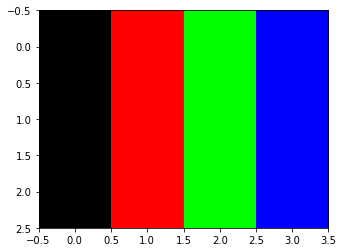

In [25]:
import numpy as np
import matplotlib.pyplot as plt

arr_test = np.array([[[0, 0, 0], [255, 0, 0], [0, 255, 0], [0, 0, 255]],
                     [[0, 0, 0], [255, 0, 0], [0, 255, 0], [0, 0, 255]],
                     [[0, 0, 0], [255, 0, 0], [0, 255, 0], [0, 0, 255]]])

print(arr_test.shape)
plt.imshow(arr_test)
plt.show()

## RGBA 적용
- RGB에 투명도까지 표시
- [R, G, B, A] = [Red, Green, Blue, 투명도]
- 투명도는 0 ~ 1 사이의 값을 가짐
    - 0 : 완전 투명 ~ 1 : 완전 불투명

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


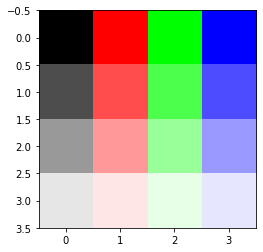

In [26]:
import numpy as np
import matplotlib.pyplot as plt

arr_test = np.array([[[0, 0, 0, 1.0], [255, 0, 0, 1.0], [0, 255, 0, 1.0], [0, 0, 255, 1.0]],
                     [[0, 0, 0, 0.7], [255, 0, 0, 0.7], [0, 255, 0, 0.7], [0, 0, 255, 0.7]],
                     [[0, 0, 0, 0.4], [255, 0, 0, 0.4], [0, 255, 0, 0.4], [0, 0, 255, 0.4]],
                     [[0, 0, 0, 0.1], [255, 0, 0, 0.1], [0, 255, 0, 0.1], [0, 0, 255, 0.1]]])

plt.imshow(arr_test)
plt.show()

## 랜덤한 색상 이미지
- imshow method와 numpy의 randint를 이용해서 가로 200, 세로 200개의 픽셀에 랜덤한 색상을 넣은 이미지 만들기

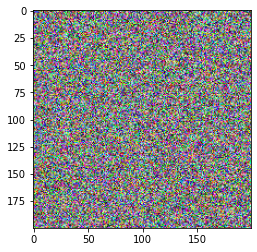

In [28]:
import numpy as np
import matplotlib.pyplot as plt

len_x = 200
len_y = 200

list_image = []
for y in range(len_y):
    list_row = []
    for x in range(len_x):
        rgb_color = np.random.randint(0, 256, size=(3,)).tolist()
        list_row.append(rgb_color)

    list_image.append(list_row)

arr_image = np.array(list_image)

plt.imshow(arr_image)
plt.show()

# iter( ), next( )

In [40]:
# Python의 next() 온라인 도움말 및 dir(iterator객체) 예
help(next)
print(dir(iter(range(3))))

Help on built-in function next in module builtins:

next(...)
    next(iterator[, default])
    
    Return the next item from the iterator. If default is given and the iterator
    is exhausted, it is returned instead of raising StopIteration.

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__length_hint__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']


In [41]:
# Python의 iter() 및 next() 함수 사용 예
x = ['Python', 'Java']
iter_x = iter(x)
print(iter_x, type(iter_x))

x = next(iter_x)
print(x)

x = next(iter_x)
print(x)

x = next(iter_x)
print(x)

<list_iterator object at 0x7fddf4578520> <class 'list_iterator'>
Python
Java


StopIteration: 

In [43]:
# Python의 iterator의 StopIteration except 처리 예
x = ['Python', 'Java']
iter_x = iter(x)
while True:
    try:
        data = next(iter_x)
        print('iterator data = ',data)
    except StopIteration:
        print('\nEnd of iteration')
        break
# end while True
print('Program Successfully finished...')

iterator data =  Python
iterator data =  Java

End of iteration
Program Successfully finished...


In [44]:
# Python의 iterator 객체의 __iter__() 및  __next__() method 사용 예
x = ['Python', 'Java']
iter_x = x.__iter__()
print(iter_x, type(iter_x))

x = next(iter_x)
print(x)

x = next(iter_x)
print(x)

x = next(iter_x)
print(x)

<list_iterator object at 0x7fde0aa7c1c0> <class 'list_iterator'>
Python
Java


StopIteration: 

In [46]:
# Python의 iterator 객체의 for 명령어 사용 예
x = ['Python', 'Java']
iter_x = iter(x)

for data in iter_x:
    print(data)

Python
Java


In [53]:
# Python의 iterator 객체 len() 및 인덱싱 처리 불가 예
x = ['Python', 'Java']
iter_x = iter(x)
len(iter_x)

TypeError: object of type 'list_iterator' has no len()

In [52]:
iter_x[0]

TypeError: 'list_iterator' object is not subscriptable

In [54]:
# Python의 iterator 객체의 재사용 불가 예
x = ['Python', 'Java']
iter_x = iter(x)

for data in iter_x:
    print('iterator for loop data = ', data)
# end for loop

while True:
    try:
        data = next(iter_x)
        print('iterator while loop data = ', data)
    except StopIteration:
        print('\nEnd of Iteration')
        break
# end while True

print('\nProgram Successfully finished...')

iterator for loop data =  Python
iterator for loop data =  Java

End of Iteration

Program Successfully finished...
